# Dimensionsreduktion

## PCA

Die Principal Component Analysis (Hauptkomponentenanalyse) ist ein unsupervised Verfahren, bei dem eine Koordinatentransformation auf den Daten vorgenommen wird, sodass die neuen Koordinatenachsen geordnet sind danach, wo die Daten die höhere Varianz aufweisen.
Eine sehr häufige Anwendung ist eine Projektion auf die ersten (wenigen) Koordinaten nach einer PCA, um die Anzahl der Dimensionen zu reduzieren ohne dabei zu viel Informationen aus den Daten wegzuwerfen.

```{admonition} Beispiel
Wenn man Daten im dreidimensionalen Raum hat, bei denen aber die dritte Koordinate $z$ stets $1$ ist, so ändert eine Projektion auf die $xy$-Ebene nichts am Informationsgehalt der Daten. Wenn die Daten hingegen in der $z$-Koordinate geringfügig um die $1$ variieren, in den $x$- und $y$-Koordinaten aber deutlich stärker variieren, so ändert eine Projektion auf die $xy$-Ebene nur wenig am Informationsgehalt der Daten.
```

Eine Koordinatentransformation ist nichts anderes als eine Matrixmultiplikation mit einer invertierbaren quadratischen Matrix. So eine Matrix kann in jede Richtung stauchen oder strecken und außerdem um jede Achse um einen Winkel drehen oder scheren. Das Ziel der PCA ist es, Koordinaten zu finden, sodass in der ersten Achse, der $x$-Achse, die höchste Varianz vorliegt.
Erinnerung: Bei einer Matrix, interpretiert als lineare Abbildung durch Matrixmultiplikation, sind die Bilder der Basisvektoren genau die Spalten der Matrix.
Wenn wir einen Vektor bestimmen können, der die Richtung der größten Varianz angibt, können wir diesen in eine Matrix als erste Spalte schreiben und auf den Untervektorraum projizieren, der orthogonal zu diesem Vektor ist (d.h. wir betrachten alle Vektoren, die mit unserer ersten Matrixspalte einen rechten Winkel haben, da bleibt ein Vektorraum eine Dimension kleiner übrig).
Induktiv können wir nun weitermachen um eine Matrix $M$ zu bestimmen. Die Umkehrabbildung $M^{-1}$ ist dann eine Transformation, die die Richtung der größten Varianz auf den ersten Einheitsbasisvektor abbildet, also auf die $x$-Achse.

Leider haben wir bisher noch nicht festgestellt, wie man die Richtung der größten Varianz herausfindet.

### Herleitung

```{admonition} Beispiel
Wenn wir ein Sample einer bivariaten Standardnormalverteilung betrachten, können wir einen Kreis um das 95\%-Quantil zeichnen.
Die Matrix $\begin{pmatrix} 2 & 0 \\ 0 & 1\end{pmatrix}$ ist eine Streckung auf der $x$-Achse, die aus dem hübschen Kreis eine langgezogene Ellipse macht.
Die Richtung der größten Varianz ist dann genau die $x$-Achse.
```

```{admonition} Beispiel
Wenn eine beliebige invertierbare Matrix $M = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$ auf ein Sample einer bivariaten Standardnormalverteilung angewendet wird, dann können wir die Richtungen mit größter Varianz bestimmen als die Richtungen, die von $M$ am stärksten gestreckt werden. Dass wäre ein Vektor $v$ mit $Mv = \lambda v$ für das größte solche $\lambda$.
```

Diese Beispiele bringen uns darauf, uns vorzustellen, welche Matrix $M$ die beobachteten Daten aus einer Standardnormalverteilung hervorgebracht haben könnte (zumindest, bei welcher das am plausibelsten wäre). Genau die Eigenvektoren zum größten Eigenwert von $M$ sind dabei die Richtungen der größten Varianz.

```{admonition} Beispiel
Wenn wir die Kovarianzmatrix einer bivariaten Standardnormalverteilung betrachten, also $\begin{pmatrix} \mathbb{V}(X) & Cov(X,Y) \\ Cov(Y,X) & \mathbb{V}(Y) \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$
und dann, wie sich die Kovarianzmatrix eines Samples ändert, wenn wir die Koordinatentransformation $\begin{pmatrix} 2 & 0 \\ 0 & 1\end{pmatrix}$ durchführen,
beobachten wir eine Quadrierung: beim Berechnen der Sample-Kovarianz $Cov(x,y) = \frac{1}{n} \sum_{i=1}^n x_iy_i$ geht die Skalierung mit $2$ einfach ein, bei $\mathbb{V}(x) = Cov(x,x)$ aber quadratisch. Die Auswirkung der Koordinatentransformation ist also die "Wurzel" aus der Kovarianzmatrix nach der Koordinatentransformation (wohlgemerkt, weil wir es so eingerichtet hatten, dass die Kovarianzmatrix vorher die Identität, also die Einheitsmatrix war).
```

So eine Kovarianzmatrix kann man immer aufstellen. Wenn wir das mit unseren echten Daten machen, und dann daraus eine "Wurzel" ziehen könnten, dann hätten wir die Matrix $M$ bestimmt.
Zum Glück haben Kovarianzmatrizen eine besondere Eigenschaft: sie sind positiv definit und symmetrisch.

```{admonition} Satz
Zu jeder positiv definiten symmetrischen Matrix $C$ existiert eine invertierbare Matrix $\Sigma$ mit $\Sigma^2 = C$.
```

Um diese Matrix $\Sigma$ zu bestimmen, gibt es eine sehr einfache Möglichkeit, wenn $C$ eine Diagonalmatrix mit lauter positiven Einträgen ist, denn dann ist $\Sigma$ eine Diagonalmatrix, deren Einträge die jeweiligen Wurzeln sind.
Wenn aber $C$ keine Diagonalmatrix ist, dann gibt es Verfahren, die Koordinaten zu wechseln, um aus $C$ eine Diagonalmatrix zu machen. Das bedeutet mathematisch, dass man $C$ ersetzen kann durch eine Transformation $T$ rückwärts, dann eine Diagonalmatrix $C'$, dann die Transformation $T$ vorwärts. In Formeln: $C = T C' T^{-1}$.

Angenommen, wir hätten eine derartige Zerlegung bestimmt (man sagt auch: eine Eigenraumzerlegung), dann können wir $\Sigma'$ als Wurzel zu $C'$ berechnen und $\Sigma = T \Sigma' T^{-1}$ erfüllt 

$$\Sigma^2 = T \Sigma' T^{-1} T \Sigma' T^{-1} = T \Sigma'^2 T^{-1} = T C' T^{-1} = C.$$

Die gesuchte Matrix $T$ erfüllt $C = T C' T^{-1}$, umgestellt also $C T = T C'$. Das bedeutet für jede Spalte $v = T_{,i}$ von $T$ und dem $i$-ten Diagonaleintrag $\alpha_i$ von $C'$ eine Gleichung $C v = v \alpha_i$, d.h. die Spalten von $T$ sind genau die Eigenvektoren von $C$ und die Diagonaleinträge von $C'$ sind genau die Eigenwerte von $C$ zu diesen Eigenvektoren.

Damit haben wir also alle Zutaten beisammen, wenn wir nur irgendwie die Eigenvektoren der Kovarianzmatrix bestimmen können!

Ein gutes Verfahren, um den Eigenvektor zum größten Eigenwert zu bestimmen: fange mit einem zufälligen Vektor an und wende die Matrix darauf an. Wenn es ein Eigenvektor ist - gut, merken wir. Wenn nicht, so wird der Vektor dadurch in eine Richtung abgebildet, die mit höherer Wahrscheinlichkeit etwas mehr in Richtung des Eigenvektors zum größten Eigenwert zeigt. Wenden wir die Matrix also wiederholt an, ist die Chance groß, immer näher an einen Eigenvektor zu kommen.

Ein weniger effizientes Verfahren ist das, was Sie in der linearen Algebra gelernt haben sollten: man bestimmt zunächst die Eigenwerte als Nullstellen des charakteristischen Polynoms $\det(M - X Id)$ und für jeden Eigenwert $\alpha$ bestimmt man den Eigenraum $Ker(M - \alpha Id)$ mit dem Gaussverfahren, d.h. man löst die Gleichung $Mv = \alpha v$.

Numpy und Scikit-Learn greifen auf LAPACK zurück, was in Fortran geschrieben ist und eine Singulärwertzerlegung (die Zerlegung $C = TC' T^{-1}$) in zwei Schritten durchführt. Wir wollen uns darüber nicht länger den Kopf zerbrechen, denn das gehört in eine Lineare Algebra- oder Numerik-Vorlesung.
Wir wollen natürlich trotzdem den Rechner zur Hilfe nehmen:

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
C = np.array([[2.5, 0.5], [0.5, 1.75]])       # zum Beispiel!
eigenvalues, eigenvectors = np.linalg.eig(C)
print(eigenvalues)
print(eigenvectors)
T, s, vh = np.linalg.svd(C) # SVD = Singular Value Decomposition
assert np.all(np.isclose(s, eigenvalues))
print("die Transformation T ist in diesem Beispiel:")
print(T)
# Da C eine symmetrische positiv definite Matrix war, ist vh = T^{-1}
assert np.all(np.isclose(vh, np.linalg.inv(T)))

[2.75 1.5 ]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
die Transformation T ist in diesem Beispiel:
[[-0.89442719 -0.4472136 ]
 [-0.4472136   0.89442719]]


Jetzt betrachten wir anstelle der fiktiven Kovarianzmatrix $C$ ein echtes Sample $x$, welches wir dann mit einer Koordinatentransformation verzerren und mit der eben besprochenen Methode die Koordinatentransformation rückgängig machen:

[[45.71273802 12.2288868 ]
 [12.2288868   6.07650301]]


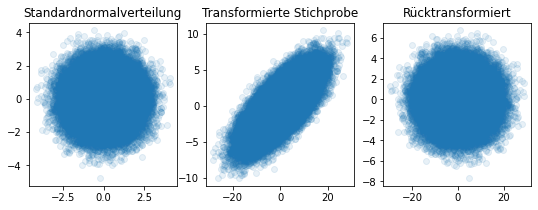

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))


x = st.multivariate_normal(mean=[0,0], cov=np.eye(2)).rvs(100000)
C = np.cov(x, rowvar=False)
assert np.all(np.isclose(np.eye(2), C, atol=0.1))
axs[0].scatter(x[:,0], x[:,1], alpha=0.1)
axs[0].set_title("Standardnormalverteilung")

# eine willkürliche Transformation:
Q = np.array([[6.75, 0.25], [1.75, 1.75]])
new_x = np.matmul(Q, x.T).T
axs[1].scatter(new_x[:,0], new_x[:,1], alpha=0.1)
axs[1].set_title("Transformierte Stichprobe")
new_C = np.cov(new_x, rowvar=False)
print(new_C)

T, s, Tinv = np.linalg.svd(new_C)
newer_x = np.matmul(Tinv, new_x.T).T
axs[2].scatter(newer_x[:,0], newer_x[:,1], alpha=0.1)
axs[2].set_title("Rücktransformiert")

plt.show()

### Berechnung

Ebenso können wir nun natürlich mit Daten verfahren, die wir gar nicht selbst transformiert haben, die möglicherweise auch gar nicht ursprünglich aus einer Standardnormalverteilung gesampelt wurden.

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


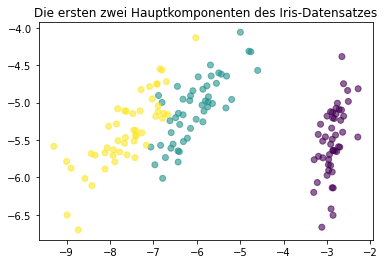

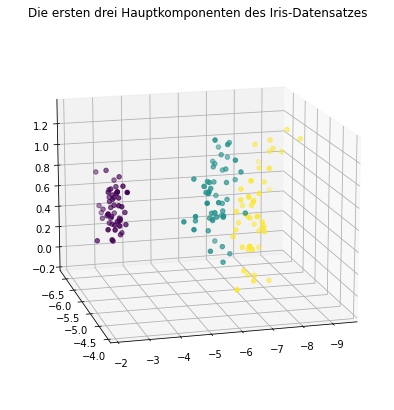

In [4]:
iris = datasets.load_iris()
x = iris.data
C = np.cov(x, rowvar=False)
print(C)
T, s, Tinv = np.linalg.svd(C)
pca_x = np.matmul(Tinv, x.T).T

fig, ax = plt.subplots()
ax.scatter(pca_x[:,0], pca_x[:,1], c=iris.target, alpha=0.6)
ax.set_title("Die ersten zwei Hauptkomponenten des Iris-Datensatzes")
plt.show()

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.view_init(15, 75)
ax.scatter3D(pca_x[:,0], pca_x[:,1], pca_x[:,2], c=iris.target)
ax.set_title("Die ersten drei Hauptkomponenten des Iris-Datensatzes")
plt.show()

### Berechnung mit Scikit-learn

Wir müssen uns noch nicht einmal die Mühe machen, selbst die Singulärwertzerlegung oder die Eigenvektoren der Kovarianzmatrix auszurechnen - das kann Scikit-learn auch für uns tun:

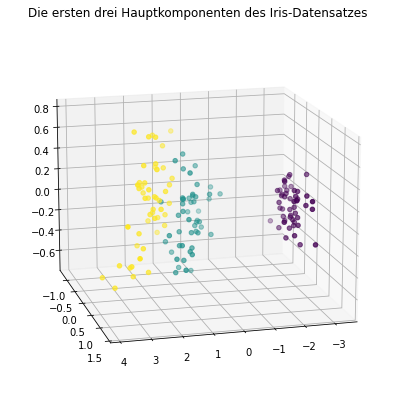

In [5]:
from sklearn.decomposition import PCA

pca_iris = PCA().fit_transform(iris.data)

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.view_init(15, 75)
ax.scatter3D(pca_iris[:,0], pca_iris[:,1], pca_iris[:,2], c=iris.target)
ax.set_title("Die ersten drei Hauptkomponenten des Iris-Datensatzes")
plt.show()

Ein ganz anderer Zugang zum finden der Richtung maximaler Varianz ist es, die Summe der quadrierten Abstände der Punkte zu einer Geraden zu minimieren. Dieses Vorgehen ist hier bildlich dargestellt:

```{figure} images/pca-variation.gif
:width: 600px
:align: center
:name: pca-variation


```

### Anwendungsbeispiel MNIST

Bisher haben wir die Dimension nur zum plotten reduziert - für viele Algorithmen ist es aber erforderlich, die Dimension wenigstens hinreichend klein zu halten, damit das Programm nicht wochenlang laufen muss. Ein Datensatz, der etwas mehr als nur $4$ Variablen hat, ist der MNIST Datensatz von handschriftlichen Ziffern.

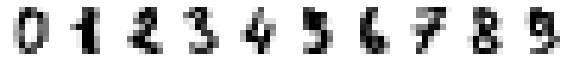

0.7298671763577128
0.7308421804758987
0.7738350349111571


In [6]:
digits = datasets.load_digits()
fig, axs = plt.subplots(1,10, figsize=(10,1))
for i in range(10):
    axs[i].axis("off")
    axs[i].matshow(digits.images[i],
                   cmap='gray_r')
plt.show()
x = digits.data
pca_x = PCA().fit_transform(x)

from sklearn.cluster import KMeans
kmeans_result = KMeans(n_clusters=10, n_init=1).fit(x)
kmeans_after_pca = KMeans(n_clusters=10, n_init=1).fit(pca_x)

from sklearn import metrics
print(metrics.normalized_mutual_info_score(digits.target, kmeans_result.labels_))
print(metrics.normalized_mutual_info_score(digits.target, kmeans_after_pca.labels_))
print(metrics.normalized_mutual_info_score(kmeans_result.labels_, kmeans_after_pca.labels_))

In [7]:
# Jetzt schmeissen wir Dimensionen weg,
# und analysieren wie dadurch die Klassifikation leidet:
scores = np.full(33, 0.0)
pca_x = PCA().fit_transform(x)

def update_scores(scores, pca_x, maxn, minn):
    for n in range(maxn, minn-1, -1):
        pca_x = pca_x[:,:n]
        kmeans_after_pca = KMeans(n_clusters=10, n_init=1).fit(pca_x)
        scores[n] = metrics.normalized_mutual_info_score(digits.target, kmeans_after_pca.labels_)
    return scores, pca_x

In [8]:
# Work in batches to avoid Jupyter cell timeout after 30 seconds:
scores, pca_x = update_scores(scores, pca_x, 32, 17)

In [9]:
scores, pca_x = update_scores(scores, pca_x, 16, 1)

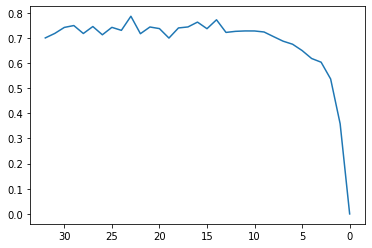

In [10]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, 33), scores)
ax.invert_xaxis()
plt.show()

Wie man im Graph erkennen kann, leidet die 10-Means-Performance als Klassifikator erst, wenn man von den ursprünglich 64 Dimensionen nur noch 10 übrig lässt, und dann weiter reduziert.

Wir haben in den Iris-Daten bereits gesehen, dass die Kovarianzmatrizen innerhalb der Gruppen leicht unterschiedlich ausfallen. Genau genommen wollen wir für eine optimale Unterscheidung der Gruppen auch gar nicht die Richtungen der größten Varianz bevorzugt betrachten, sondern noch viel lieber die Richtung, die die beste Unterscheidung erlaubt. Um das zu betrachten, muss man die Klassen aber bereits kennen - also supervised learning. Ein solches Verfahren ist Linear Discriminant Analysis (LDA).

## Skalenunterschiede

Problematisch wird es, wenn die Daten nicht, wie in den Beispielen zuvor, auf gleichen Skalen liegen (einmal Meter, einmal Zentimeter) oder sogar die Skalen unbekannt oder inkompatibel (Sekunden, Meter) sind.

Dann dominieren die Variablen mit großen Zahlen, was eine Verzerrung der eigentlich angestrebten Koordinatentransformation ist. Um das zu vermeiden, reskaliert man jede Variable mit der Standardabweichung. Ebenso transliert man jede Variable sodass der Mittelwert $0$ wird. Das nennt sich 'Standardisierung'. Es ist dann besonders sinnvoll, wenn die Variable annähernd normalverteilt ist.

Eine 'Normalisierung' ist eine Reskalierung auf das Intervall $[0,1]$. Sie ist dann besonders sinnvoll, wenn die Variable nicht normalverteilt ist.

Jede solche Umskalierung nennt sich 'Feature Scaling'.

In Python kann man das mit Scikit-Learn machen, indem man ein `Scaler`-Objekt verwendet:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.random.seed(1234)

# craft some dummy data:
dummycenters = [[10, 0.04, 3],
                [20, 0.03, 2],
                [30, 0.02, 1],
                [40, 0.01, 4]]
# make a random symmetric matrix with A@A.T for a random matrix A,
# make it positive definite by adding an identity matrix
dummycovs = (4*(A@A.T + np.eye(3))
             for A in (np.random.rand(3,3)
                       for _ in range(4)))
dummydata = np.concatenate([np.random.multivariate_normal(center,
                                                          cov,
                                                          size=200)
             for center, cov in zip(dummycenters, dummycovs)])
dummymu = np.mean(dummydata, axis=0)

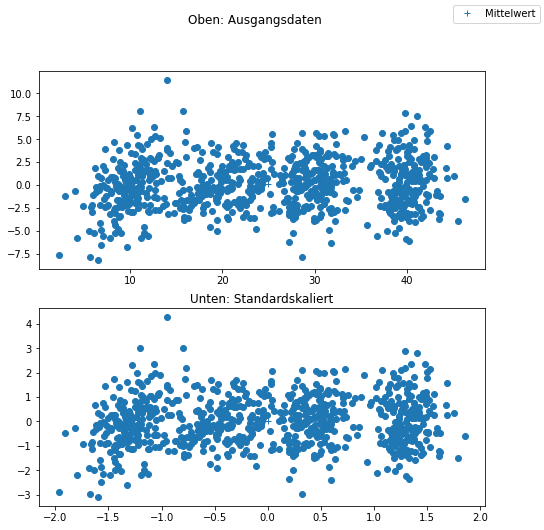

In [12]:
# scale it:
scaler = StandardScaler()
scaled = scaler.fit_transform(dummydata)
scaledmu = np.mean(scaled, axis=0)

# let's take a look:
fig, axs = plt.subplots(2, 1, figsize=(8,8))
axs[0].scatter(dummydata[:,0], dummydata[:,1])
axs[0].plot(dummymu[0], dummymu[1], "+",
            label="Mittelwert")
axs[1].scatter(scaled[:,0], scaled[:,1])
axs[1].plot(scaledmu[0], scaledmu[1], "+")
axs[1].set_title("Unten: Standardskaliert")
fig.legend()
fig.suptitle("Oben: Ausgangsdaten")
plt.show()

Wir betrachten jetzt den Einfluss der Skalierung auf die PCA und anschließendes Clustering mit k-Means,
denn anstatt einfach immer alles durch den StandardScaler zu jagen, sollte man stets betrachten, welchen Unterschied es macht:

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

dummy_pca = PCA().fit_transform(dummydata)
scaled_pca = PCA().fit_transform(scaled)

dummy_kmeans = KMeans(4, n_init=1).fit(dummy_pca)
scaled_kmeans = KMeans(4, n_init=1).fit(scaled_pca)

# to compare:
original_labels = np.concatenate([np.full(200, k) for k in range(4)])

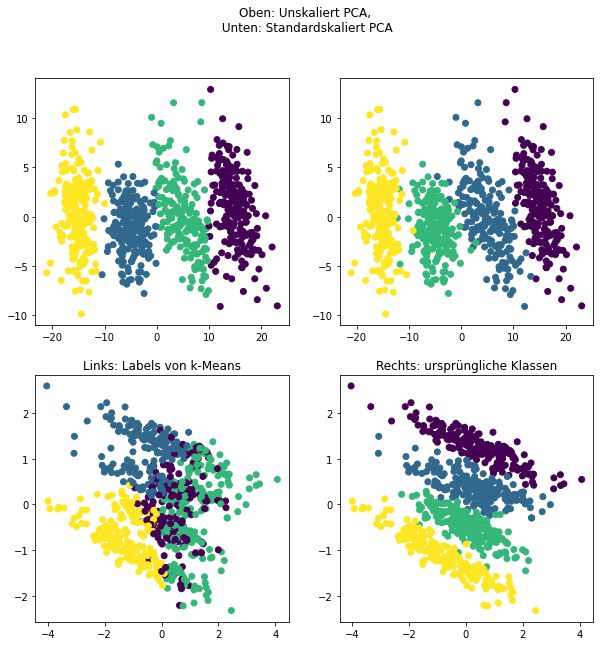

In [14]:
# let's take a look:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0][0].scatter(dummy_pca[:,0], dummy_pca[:,1],
               c=dummy_kmeans.labels_)
axs[1][0].scatter(scaled_pca[:,0], scaled_pca[:,1],
               c=scaled_kmeans.labels_)
axs[0][1].scatter(dummy_pca[:,0], dummy_pca[:,1],
               c=original_labels)
axs[1][1].scatter(scaled_pca[:,0], scaled_pca[:,1],
               c=original_labels)
axs[1][0].set_title("Links: Labels von k-Means")
axs[1][1].set_title("Rechts: ursprüngliche Klassen")
fig.suptitle("Oben: Unskaliert PCA,\n Unten: Standardskaliert PCA")
plt.show()

Man kann in der oberen Zeile deutlich erkennen, dass k-Means auf den unskalierten Daten gut funktioniert.
An der unteren Zeile sehen wir, dass bei Standardskalierung die Hauptkomponenten anders liegen (daher sieht das Bild gedreht aus),
aber auch, dass k-Means die Cluster nicht gut eingeteilt hat.

Das ist letzlich eine Inkarnation von Simpson's Paradox, denn die "richtige" Art, die Daten zu skalieren, wäre hier so, dass die Cluster möglichst standardnormalverteilt werden. Um das zu erreichen müsste man aber erst Clustern, dann die Standardskalierung der Cluster berechnen, mit einem geeigneten Mittelwert davon dann die ganzen Daten gemeinsam skalieren. Danach ergibt sich beim Clustern wiederum ein anderes Bild - und man kann das Verfahren iterieren. In diesem Setting ist es vorteilhaft, nicht k-Means zu verwenden, sondern gleich ein Verfahren, welches keine standardnormalverteilten Cluster annimmt (z.B. gemischte Gausssche Modelle).

### Anwendungsbeispiel Wine

Zuletzt betrachten wir noch ein 'Erfolgsbeispiel' des Standardskalierens:

In [15]:
import pandas as pd
from sklearn.datasets import load_wine

df, target = load_wine(return_X_y=True, as_frame=True)
assert type(df) == pd.DataFrame
assert type(target) == pd.Series

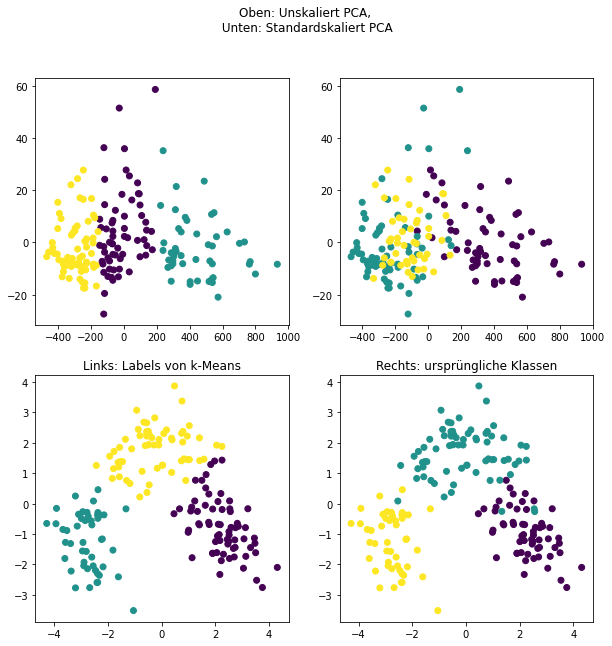

In [16]:
unscaled_pca = PCA(n_components=2).fit_transform(df)
unscaled_kmeans = KMeans(3, n_init=1).fit(unscaled_pca)

scaled = StandardScaler().fit_transform(df)
scaled_pca = PCA(n_components=2).fit_transform(scaled)
scaled_kmeans = KMeans(3, n_init=1).fit(scaled_pca)

fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0][0].scatter(unscaled_pca[:,0], unscaled_pca[:,1], c=unscaled_kmeans.labels_)
axs[1][0].scatter(scaled_pca[:,0], scaled_pca[:,1], c=scaled_kmeans.labels_)
axs[0][1].scatter(unscaled_pca[:,0], unscaled_pca[:,1], c=target)
axs[1][1].scatter(scaled_pca[:,0], scaled_pca[:,1], c=target)
axs[1][0].set_title("Links: Labels von k-Means")
axs[1][1].set_title("Rechts: ursprüngliche Klassen")
fig.suptitle("Oben: Unskaliert PCA,\n Unten: Standardskaliert PCA")
plt.show()

Statt hier nur auf das Bild zu achten, ist es besser, auch eine Kennzahl auszurechnen. Wie zuvor verwenden wir dazu ein Entropie-basiertes Maß, die gemeinsame Entropie der beiden Klassenverteilungen, normiert auf den Mittelwert der Entropien der einzelnen Klassenverteilungen:

In [17]:
from sklearn.metrics import normalized_mutual_info_score

scaled_score = normalized_mutual_info_score(scaled_kmeans.labels_, target)
unscaled_score = normalized_mutual_info_score(unscaled_kmeans.labels_, target)

print("Die skalierte Variante ist mit %f Ähnlichkeit zur 'echten' Klasse besser als die unskalierte Variante mit nur %f Ähnlichkeit" % (scaled_score, unscaled_score))

Die skalierte Variante ist mit 0.846356 Ähnlichkeit zur 'echten' Klasse besser als die unskalierte Variante mit nur 0.428757 Ähnlichkeit
